# Project1

#### Fiona Almeyda Wijaya

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing

## Binary Logistic Regression

In [595]:
#load titanic data set
data_directory = '/Users/fionalmeyda/Documents/GitHub/MATH373/Project1/'
#read_csv allows you to control delimeters, column and row names
df_train = pd.read_csv(data_directory + 'train.csv') #f(xi)
df_test = pd.read_csv(data_directory + 'test.csv')
df_out =pd.read_csv(data_directory + 'gender_submission.csv')
yi = df_train['Survived'] #ground truth

In [596]:
median_fare =df_train['Fare'].median()#median fare

In [597]:
def fill_in(df):
    df['Fare'].fillna(median_fare, inplace =True)
    return df

In [598]:
df_train =fill_in(df_train)
df_test = fill_in(df_test)

In [599]:
#Data 
#df_train.head()
drop_cols= ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Cabin','Embarked']
drop_cols2 = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
X = preprocessing.StandardScaler().fit_transform(df_train.drop(columns = drop_cols))
y = df_train['Survived'].values
X_test = preprocessing.StandardScaler().fit_transform(df_train.drop(columns = drop_cols2))
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.25, random_state =42)#Splitting the dataset into train & test

In [600]:
xi_vals = X_train[:,0]
yi_vals = y_train 
#X_train
vector_one =np.ones(shape=y_train.shape)[..., None]
Xi_hat =np.concatenate((vector_one, X_train), 1)

validation_x = X_test1[:,0]
validation_y =y_test1
vector1 =np.ones(shape =y_test1.shape)[...,None]

validation_set = np.concatenate((vector1, X_test1), 1)
#validation_set

In [601]:
#initialize beta
Xi_hat.shape[0]
t=669 #d+1
beta = np.random.randn(t,2)


In [602]:
#beta

In [603]:
#f_xi_dot_beta = np.vdot(Xi_hat,beta)
#f_xi = sigmoid_function
Xi_hat_transpose = Xi_hat.T

In [604]:
def dot_mat_fxi (b,x):
    N= x.shape[0]
    f =0
    for i in range(N):
        x1 =x[i]
        beta =b[i]
        f=np.vdot(x1,beta)
    return f

In [605]:
f1 =dot_mat_fxi(beta,Xi_hat)
q =sigmoid_function(f1) 
f1

-3.3965751647215603

In [606]:
def cross_entropy_binary(p,q):
    binary = -p*np.log(q)- ((1-p)*np.log(1-q))
    return binary    

In [607]:
l1 = cross_entropy_binary(yi_vals,q)
#p =yi_vals

In [608]:
def L(beta,x,y):
    N = x.shape[0]
    output =0
    q = sigmoid_function(dot_mat_fxi(beta,x))
    p = y
    for i in range(N):
        xi_hat = x[i]
        yi = y[i]
        output += cross_entropy_binary(y,q)
        #print('test',output)
        
    output = sum(output)/N
    return output

In [609]:
testing =L(beta,Xi_hat, yi_vals)
#testing.shape
#testing

In [610]:
def L_grad(beta,x,y):
    N = x.shape[0]
    grad= 0
    q = sigmoid_function(dot_mat_fxi(beta,x))
    p=y
    for i in range(N):
        xi_hat = x[i]
        yi = y[i]
        grad_i = (q - yi)* xi_hat
        grad+=grad_i
    return grad/N

In [611]:
testing1 =L_grad(beta,Xi_hat,yi_vals)
#testing1
#testing1.shape

In [612]:
def minimizing_grad_desc(x,y):
    alpha =0.005
    num_iters =1000
    L_vals = np.zeros(num_iters)
    beta_t = np.zeros(x.shape)
    for t in range(num_iters):
        L_vals[t]= L(beta_t,x,y)
        #print('Iterations : ',t,'objective function values : ', L_vals[t])
        beta_t =beta_t - alpha * L_grad(beta_t,x,y)
    return beta_t,L_vals

In [613]:
beta_est , L_vals = minimizing_grad_desc(Xi_hat, yi_vals)

Text(0, 0.5, 'Values of Objective Function')

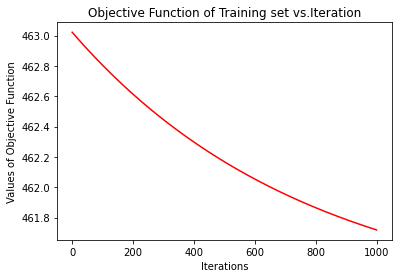

In [614]:
plt.plot(L_vals, color= "red")
plt.title("Objective Function of Training set vs.Iteration")
plt.xlabel('Iterations')
plt.ylabel('Values of Objective Function')

In [615]:
beta_est[0]

array([-0.59398515,  0.63631905])

In [616]:
beta_est1 , L_vals1 = minimizing_grad_desc(validation_set, validation_y)

Text(0, 0.5, 'Values of Objective Function')

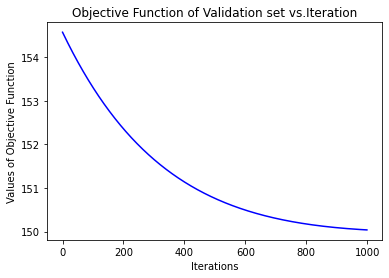

In [617]:
plt.plot(L_vals1, color= "blue")
plt.title("Objective Function of Validation set vs.Iteration")
plt.xlabel('Iterations')
plt.ylabel('Values of Objective Function')

In [618]:
beta_est1[0]

array([-0.22790936,  0.59414876])

In [619]:
df_out.to_csv(data_directory + 'submit_kaggle.csv', index = False)